In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Sprawdzenie poprawności zbiorów

In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension is not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimension is not 28x28"

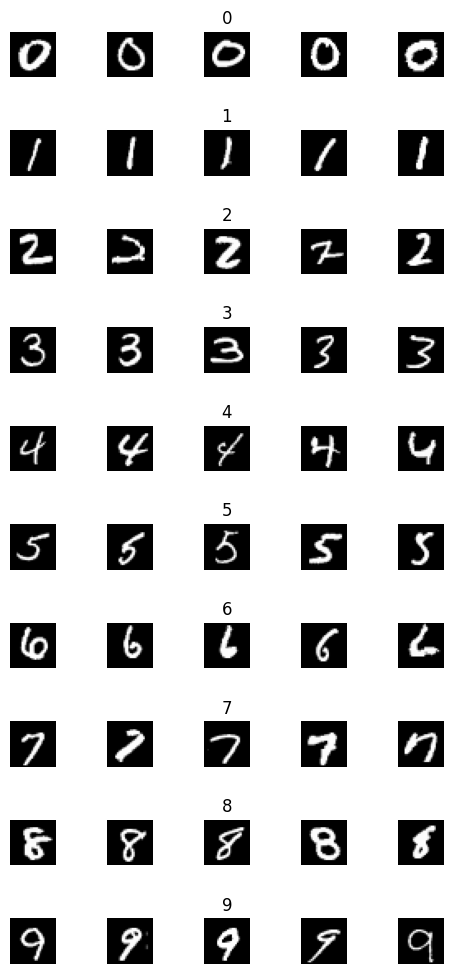

In [14]:
num_of_samples = []
cols = 5
num_classes = 10

fig, axis = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap='gray')
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

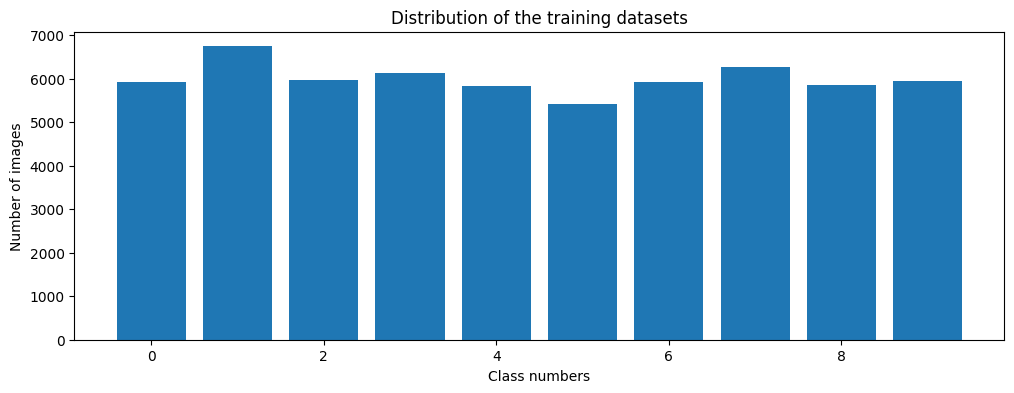

In [17]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training datasets")
plt.xlabel("Class numbers")
plt.ylabel("Number of images")

In [18]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Normalizacja (żeby maksymalna wartość pixela wynosiła 1, a nie 255 ) \
Jest to ważne dla `obliczeń matematycznych`

In [19]:
X_train = X_train/255
X_test = X_test/255

In [21]:
num_pixels = 28**2
X_train = X_train.reshape(X_train.shape[0], num_pixels)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_test.shape)

(60000, 784)
(10000, 784)
